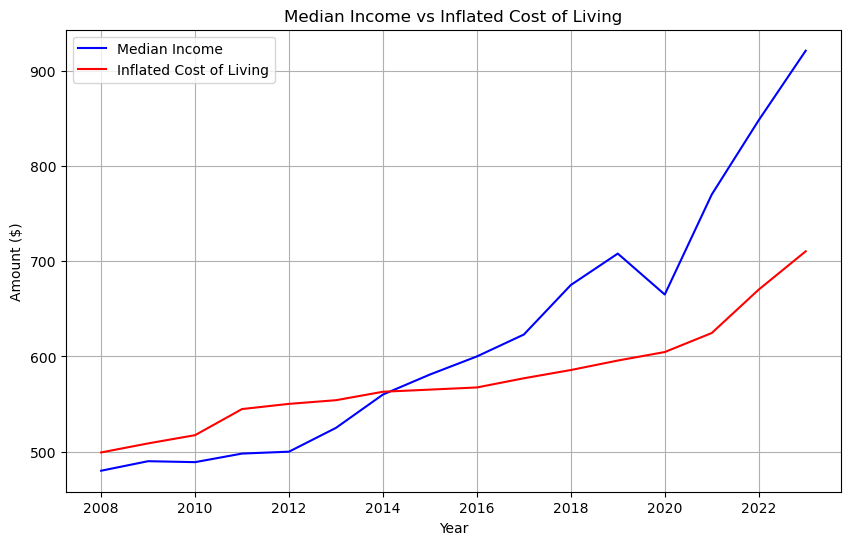

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('D:\\Professional\\UNI 23-S2\\INFO361\\Group_project')
# Load data
median_income_df = pd.read_csv('median_income.csv') 
inflation_df = pd.read_csv('inflation.csv')  

merged_df = pd.merge(median_income_df, inflation_df, on='Year')

# Calculate the inflated cost of living
original_income = 480  # Original median household income per week
merged_df['Inflated_Cost'] = original_income * (1 + merged_df['Inflation'] / 100).cumprod()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'], merged_df['Income'], label='Median Income', color='blue')
plt.plot(merged_df['Year'], merged_df['Inflated_Cost'], label='Inflated Cost of Living', color='red')
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.title('Median Income vs Inflated Cost of Living')
plt.legend()
plt.grid(True)
plt.show()


SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (3254626974.py, line 15)

In [23]:
print(median_income_df.columns)
print(inflation_df)


Index(['Year', 'Income'], dtype='object')
    Year  Inflation
0   2008        4.0
1   2009        1.9
2   2010        1.7
3   2011        5.3
4   2012        1.0
5   2013        0.7
6   2014        1.6
7   2015        0.4
8   2016        0.4
9   2017        1.7
10  2018        1.5
11  2019        1.7
12  2020        1.5
13  2021        3.3
14  2022        7.3
15  2023        6.0


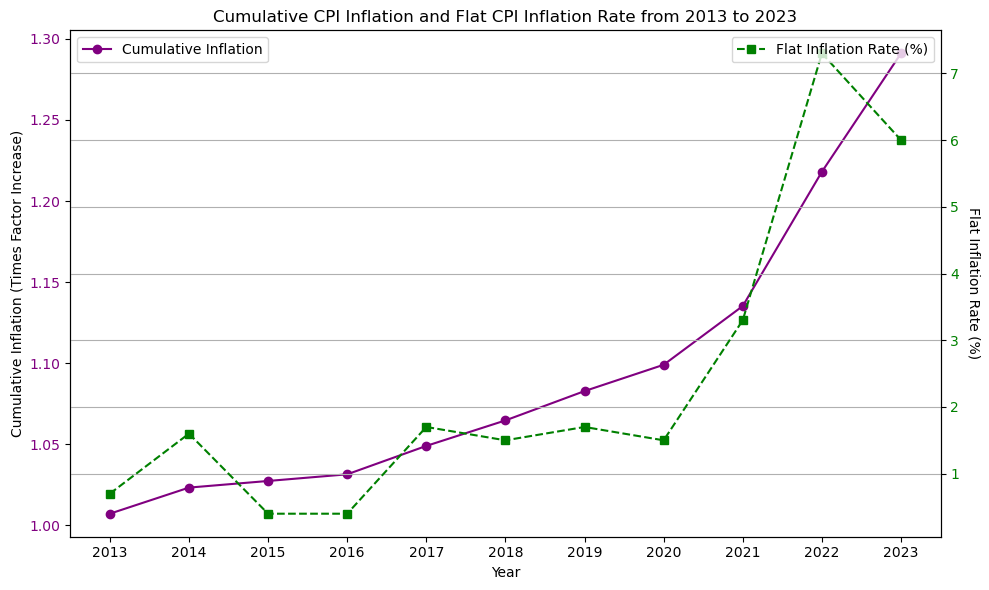

In [22]:
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

# Filter the inflation_df DataFrame to include only rows where 'Year' is between 2013 and 2023, inclusive.
filtered_inflation_df = inflation_df[(inflation_df['Year'] >= 2013) & (inflation_df['Year'] <= 2023)].copy()

# Calculate the cumulative product of inflation
filtered_inflation_df.loc[:, 'Cumulative_Inflation'] = (1 + filtered_inflation_df['Inflation'] / 100).cumprod()

# Plotting
plt.figure(figsize=(10, 6))

# Create an axis object
ax1 = plt.gca()

# Plotting Cumulative Inflation on the left y-axis
ax1.plot(filtered_inflation_df['Year'], filtered_inflation_df['Cumulative_Inflation'], color='purple', marker='o', label='Cumulative Inflation')
ax1.set_xlabel('Year')
ax1.set_ylabel('Cumulative Inflation (Times Factor Increase)')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.legend(loc='upper left')

# Create a second y-axis for the flat inflation rate
ax2 = ax1.twinx()
ax2.plot(filtered_inflation_df['Year'], filtered_inflation_df['Inflation'], color='green', marker='s', linestyle='dashed', label='Flat Inflation Rate (%)')
ax2.set_ylabel('Flat Inflation Rate (%)', rotation=270, labelpad=15)
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Formatting
plt.title('Cumulative CPI Inflation and Flat CPI Inflation Rate from 2013 to 2023')
plt.grid(True)
plt.xticks(filtered_inflation_df['Year'], rotation=45)  # Rotate x-axis labels for better readability, if needed.
plt.tight_layout()  # Adjust layout for better readability, if needed.
plt.show()

